# Homework 2: mask detection for the next pandemic
You heard rumors from biology department of EPFL about a new version of a corona virus spreading out next year, already called COVID-25. The virus is so dangerous that you are asked to develop a mask detection system to be deployed in all public places. The system should be able to detect if a person is wearing a mask or not. You are given a dataset of images of people with and without masks. Your task is to develop a machine learning model that can detect if a person is wearing a mask or not.

**IMPORTANT NOTE:** The evaluation of this homework will be done on an hidden dataset. It is important that your notebook runs without errors, otherwise we will not be able to evaluate some questions, resulting in a grade 0 for that part. Make sure to double check your code before submitting the notebook. We provide a simple `evaluate` function that you can use to make sure that all the necessary functions are implemented correctly; the function will warn you if it detects that a good prediction cannot be made. `evaluate` takes just one argument: the `scikit-learn` model that you have trained. It expects the model to have a `predict` method that works on a numpy array.

WARNING: Before running the following cell, generate the data by running the file "dataset_preprocessing.py". Make sure that the data that you generated are in the same folder of this notebook. If you are using colab (not advised for this homework), import the python files and run it from here.

In [1]:
from evaluation import evaluate

## Data loading and preprocessing
The dataset consists in $n$ images of dimension 128x128 pixels. Each pixel is represented by 3 values (RGB). The dataset is divided in two classes: 0 for people with the mask and 1 for people without the mask. 

In [2]:
import numpy as np
import sklearn

def load_file(file):
    with np.load('data/'+file+'.npz') as data:
        X = data['X']
        y = data['y']
    return X, y

X, y = load_file('train')
print(X.shape, y.shape)

(188, 3, 128, 128) (188,)


**Question 1.** Plot few images, and check the distribution of the labels.

In [3]:
import matplotlib.pyplot as plt

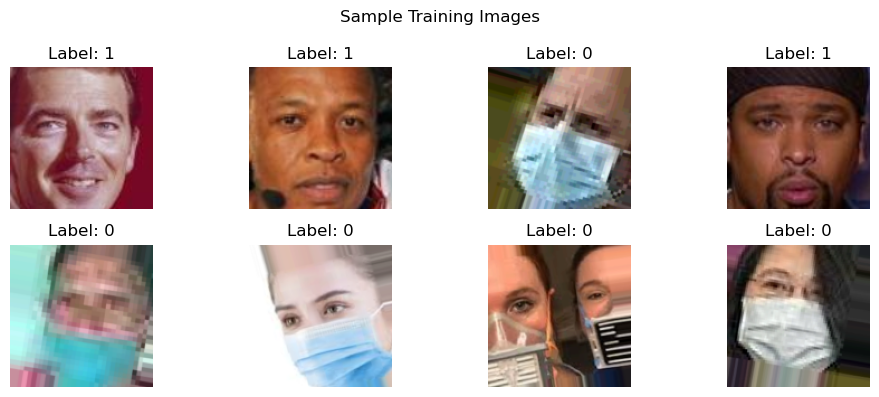

Class 0: 103 samples
Class 1: 85 samples


In [4]:
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    img = (X[i].transpose(1, 2, 0) * 255).astype(np.uint8)
    plt.imshow(img)
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()

# Check label distribution
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} samples")

**Question 2.** Reshape each image in the dataset to a flat vector. Split the dataset into training and test sets.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (131, 49152)
Test shape: (57, 49152)


**The full dataset in the generated data folder contains about 9k pictures. Training with them takes extensive amount of time, even with low max_iter. So I consider only the tensors given in Q1 and split them in to train and test.**

## Logistic regression

**Question 3.** Train a logistic regression model on the training data, comparing the accuracies of $\ell_1$ and $\ell_2$ penalties. What is the train and test accuracy of the model?

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
# L2 Regularization (default)
model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=100)
model_l2.fit(X_train, y_train)

# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=100)
model_l1.fit(X_train, y_train)

# Evaluate accuracy
train_acc_l2 = accuracy_score(y_train, model_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, model_l2.predict(X_test))

train_acc_l1 = accuracy_score(y_train, model_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, model_l1.predict(X_test))

print(f"L2 - Train accuracy: {train_acc_l2:.4f}, Test accuracy: {test_acc_l2:.4f}")
print(f"L1 - Train accuracy: {train_acc_l1:.4f}, Test accuracy: {test_acc_l1:.4f}")

/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L2 - Train accuracy: 1.0000, Test accuracy: 0.8421
L1 - Train accuracy: 0.9771, Test accuracy: 0.8421


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
model = model_l2  # or model_l1

In [10]:
# Evaluate the model
evaluate(model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.9054684188215345


**Question 4.** Make a more extensive search of possible Logistic Regressors. Crossvalidate the following parameters:
- penalty: `['l1', 'l2']`
- $C$: range from $10^{-3}$ to $10^3$.


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['saga'],
    'max_iter': [100]
}


logreg = LogisticRegression()

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Results
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

test_acc = grid.best_estimator_.score(X_test, y_test)
print("Test accuracy of best model:", test_acc)

logistic_model = grid.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/sit

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validated accuracy: 0.8931623931623932
Test accuracy of best model: 0.8421052631578947


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
# Official evaluation!
evaluate(logistic_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.9063162356930903


## SVM
**Question 4.** Train a linear SVM model on the training data and crossvalidate the parameter $C$.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
# Pipeline: scaling + linear SVM
svm_pipeline = make_pipeline(
    StandardScaler(), 
    LinearSVC(max_iter=100, dual=False) 
)

param_grid = {
    'linearsvc__C': np.logspace(-3, 3, 7) 
}

# Cross-validation search
svm_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
svm_search.fit(X_train, y_train)

# Best model
svm_model = svm_search.best_estimator_

print("Best C:", svm_search.best_params_['linearsvc__C'])
print("Best CV accuracy:", svm_search.best_score_)

test_acc = svm_model.score(X_test, y_test)
print("Test accuracy:", test_acc)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.p

Best C: 0.001
Best CV accuracy: 0.8772079772079773
Test accuracy: 0.8771929824561403


In [15]:
# Official evaluation!
evaluate(svm_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8910555320050869


## Random Forest

**Question 5.** Train a Random Forest model on the training data and crossvalidate the parameters:
- `n_estimators`
- `max_depth`
- `criteria`



In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Random Forest model
rf = RandomForestClassifier(random_state=42)

rf_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Best model
rf_model = rf_search.best_estimator_

print("Best parameters:", rf_search.best_params_)
print("Best CV accuracy:", rf_search.best_score_)

test_acc = rf_model.score(X_test, y_test)
print("Test accuracy:", test_acc)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best CV accuracy: 0.9082621082621083
Test accuracy: 0.8070175438596491


In [18]:
# Official evaluation!
evaluate(rf_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8851208139041967


## Extra data
Digging in his archive, EPFL Health autorities found a another dataset of images with the same format. This dataset is called `extratrain`. Use this dataset to improve the performance of your models.

**Question 6.** Is this new dataset good? What problem does it have compared to the original dataset, if any?

In [19]:
X_extra, y_extra = load_file('extra')

In [20]:
# print lable distribution
unique, counts = np.unique(y_extra, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Class {label} has {count} samples")


Class 0 has 4590 samples


The extra datasets contains only samples from class 0, which corresponds to "people with masks". This introduces a class imbalance problem.The data is not representative of the full classification task, which includes both classes.If added directly to training, the model may become biased toward predicting class 0, reducing generalization.

**Question 7.** Evaluate the performance of the cross-validated models you found in the previous questions on the new dataset. Is the performance better or worse? Why?

In [21]:
# Load official test set (unbiased, full size)
X_test_full, y_test_full = load_file('test')
X_test_full_flat = X_test_full.reshape(X_test_full.shape[0], -1)

log_acc = accuracy_score(y_test_full, logistic_model.predict(X_test_full_flat))
svm_acc = accuracy_score(y_test_full, svm_model.predict(X_test_full_flat))
rf_acc = accuracy_score(y_test_full, rf_model.predict(X_test_full_flat))

print(f"Logistic Regression Accuracy on test: {log_acc:.4f}")
print(f"SVM Accuracy on test:                 {svm_acc:.4f}")
print(f"Random Forest Accuracy on test:       {rf_acc:.4f}")

Logistic Regression Accuracy on test: 0.9063
SVM Accuracy on test:                 0.8911
Random Forest Accuracy on test:       0.8851


In [22]:
X_extra_flat = X_extra.reshape(X_extra.shape[0], -1)

log_acc_extra = accuracy_score(y_extra, logistic_model.predict(X_extra_flat))
svm_acc_extra = accuracy_score(y_extra, svm_model.predict(X_extra_flat))
rf_acc_extra = accuracy_score(y_extra, rf_model.predict(X_extra_flat))

print(f"Logistic Regression Accuracy on extra: {log_acc_extra:.4f}")
print(f"SVM Accuracy on extra:                 {svm_acc_extra:.4f}")
print(f"Random Forest Accuracy on extra:       {rf_acc_extra:.4f}")

Logistic Regression Accuracy on extra: 0.8453
SVM Accuracy on extra:                 0.8074
Random Forest Accuracy on extra:       0.8660


All models perform better on the balanced test set than on the extra set, because models were trained on balanced data, so they are optimized to separate both classes, not just identify class 0.


Besides, the `extra` set may contain harder or more diverse samples from class 0 (e.g., poor lighting, occlusions, angle variation, which is likely as observed in some examples of Q1). Since there are no class 1 samples in `extra`, any misclassification at all hurts accuracy more (no opportunity to “make up for it” by correctly classifying class 1).


**Question 8.** Train the most promising model using the new dataset, and crossvalidate. Is the performance better or worse? Why?

In [23]:
X_extra_flat = X_extra.reshape(X_extra.shape[0], -1)

# Cross-validate a Random Forest model on extra data only
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_extra_flat, y_extra)

# Best model
newrf_model = grid.best_estimator_

print("Best parameters:", rf_search.best_params_)
print("Best CV accuracy:", rf_search.best_score_)

# accuracy on extra data
extra_acc = accuracy_score(y_test_full, newrf_model.predict(X_test_full_flat))
print(f"Random Forest Accuracy on full test with extra-trained model: {extra_acc:.4f}")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best CV accuracy: 0.9082621082621083
Random Forest Accuracy on full test with extra-trained model: 0.5045


In [24]:
# Official evaluation!
evaluate(newrf_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.5044510385756676


We trained a new Random Forest model using only the `extra.npz` dataset, which contains only class 0. While the model achieved a high cross-validation accuracy of ~0.9, its accuracy on the official unbiased test(having both classes) set dropped to 0.5045, which is pretty much random guessing.

This is expected because the model never saw class 1 during training, so tt likely always predicts class 0, which leads to ~50% the accuracy. This is a clear sign of dataset bias, where training on an imbalanced or single-class dataset prevents the model from learning meaningful class distinctions.

This shows that high accuracy on biased data does not imply good generalization.  
To train effective classifiers, the training data must be balanced and representative of all classes.

**Question 9:** Join the `train` and `extra` datasets and repeat the previous point. What is the best model and its accuracy on the combined dataset?

**Concatenating both sets results in a combined set of 4-5k images. This is too slow for fiting for this exercice, especially when I later need to upsample the label 1 data, it will end up in about 9000 training datapoints. So I down-sized them to save time. This does not affect qualitative analysis.**

In [25]:
# Load datasets
X_train_base, y_train_base = load_file('train')
X_extra, y_extra = load_file('extra')

# take subset for speed
n_base = len(X_train_base) // 2    # take half
n_extra = len(X_extra) // 8       # take 1/8th

X_base_subset = X_train_base[:n_base]
y_base_subset = y_train_base[:n_base]
X_extra_subset = X_extra[:n_extra]
y_extra_subset = y_extra[:n_extra]

# Combine
X_combined = np.concatenate([X_base_subset, X_extra_subset], axis=0)
y_combined = np.concatenate([y_base_subset, y_extra_subset], axis=0)

# Flatten
X_combined_flat = X_combined.reshape(X_combined.shape[0], -1)

print("Combined dataset shape:", X_combined_flat.shape)

Combined dataset shape: (667, 49152)


In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_combined_flat, y_combined)

print("Best parameters:", rf_search.best_params_)
print("Best CV accuracy:", rf_search.best_score_)

# accuracy on extra data
extra_acc = accuracy_score(y_test_full, grid.best_estimator_.predict(X_test_full_flat))
print(f"Random Forest Accuracy on full test with extra+train-trained model: {extra_acc:.4f}")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Best CV accuracy: 0.9082621082621083
Random Forest Accuracy on full test with extra+train-trained model: 0.6647


In [27]:
# Official evaluation!
evaluate(grid.best_estimator_)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.6646884272997032


By adding the 'train' set to the 'extra' set, we now have some training datapoints with label 1, which helps to improve generalization. The test accuracy increased from 0.5 to 0.66. However this is still too low. Indeed, the generalization is not good enough, since label 1 data in the combined training set takes only a very small proportion, so the training is still quite biased. This the ''problem'', we solve it by resampling in Q10.

**Question 10:** Resample the joined dataset to solve the joined dataset "problem". Train a Random Forest with crossvalidation and discuss the results.

In [28]:
from sklearn.utils import resample

# upsample minority class (label 1)
X_resampled, y_resampled = resample(
    X_combined_flat[y_combined == 1],
    y_combined[y_combined == 1],
    replace=True,
    n_samples=(y_combined == 0).sum(),  # Match class 0 size
    random_state=42
)

X_oversampled = np.concatenate([X_combined_flat[y_combined == 0], X_resampled], axis=0)
y_oversampled = np.concatenate([y_combined[y_combined == 0], y_resampled], axis=0)

print("Oversampled dataset shape:", X_oversampled.shape)

Oversampled dataset shape: (1246, 49152)


In [29]:
# Train with cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],  
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_oversampled, y_oversampled)

# Final model and test accuracy
oversampled_rf_model = grid.best_estimator_

test_acc = accuracy_score(y_test_full, oversampled_rf_model.predict(X_test_full_flat))
print("Best parameters:", grid.best_params_)
print("Test accuracy after oversampling:", test_acc)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
Test accuracy after oversampling: 0.7672742687579482


In [30]:
# Official evaluation!
evaluate(oversampled_rf_model)
# Make sure the line above runs without errors before submitting your solution!

All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.7672742687579482


As we can observe, oversampling the minority class was effective in reducing bias toward the majority class and led to a better-performing model overall. Proper class balance in the training data is crucial for robust and fair classification.

**Question 11:** Repeat the previous question, but this time use `LogisticRegression` as the model. 

In [31]:
# Logistic Regression with GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['saga'],
    'max_iter': [100]
}

log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, n_jobs=-1)
log_grid.fit(X_oversampled, y_oversampled)

test_acc = accuracy_score(y_test_full, log_grid.best_estimator_.predict(X_test_full_flat))
print("Best parameters:", log_grid.best_params_)
print("Logistic Regression Accuracy on test with balanced data: {:.4f}".format(test_acc))

# Required for evaluation cell
log_model_balanced = log_grid.best_estimator_
evaluate(log_model_balanced)

/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/sit

Best parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy on test with balanced data: 0.8372
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8372191606612972


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Question 12:** Train the best model you can given the data available. Describe your technique and justify your choices.

First of all, we should choose the best training dataset, which is the oversampled balance dataset. Then we should perform CV for log, svm and rf, to find out the best accuracy each of these model can get accross all possible parameters. Finally, we compare the best offer from each of them, and pick out the best one.

We have already performed CV with oversampled balance dataset for log and rf. We now do it for SVM.

In [32]:
svm_pipeline = make_pipeline(
    StandardScaler(), 
    LinearSVC(dual=False, max_iter=100)
)

param_grid = {
    'linearsvc__C': np.logspace(-3, 3, 7)
}

svm_grid = GridSearchCV(svm_pipeline, param_grid, cv=3, n_jobs=-1)
svm_grid.fit(X_oversampled, y_oversampled)

svm_test_acc = accuracy_score(y_test_full, svm_grid.best_estimator_.predict(X_test_full_flat))
print("SVM best params:", svm_grid.best_params_)
print("SVM Accuracy on test with oversampled training data: {:.4f}".format(svm_test_acc))

best_svm_model = svm_grid.best_estimator_
evaluate(best_svm_model)


/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/xieqilin/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.p

SVM best params: {'linearsvc__C': 0.01}
SVM Accuracy on test with oversampled training data: 0.8126
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8126324713861806


Now we compare the best models from log, svm and rf with oversampled balanced training data. We can just run the evaluate function, to see their accuracy, as it also computes the accuracy over the general test dataset.

In [34]:
print('SVM best Accuracy on test with oversampled training data:')
evaluate(best_svm_model)
print('Logistic Regression best Accuracy on test with oversampled training data:')
evaluate(log_model_balanced)
print('Random Forest best Accuracy on test with oversampled training data:')
evaluate(oversampled_rf_model)


SVM best Accuracy on test with oversampled training data:
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8126324713861806
Logistic Regression best Accuracy on test with oversampled training data:
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8372191606612972
Random Forest best Accuracy on test with oversampled training data:
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.7672742687579482


The best one is logistic regression. Best parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

**Question Bonus:** You have been told that is much more important to detect people without masks than people with masks. How would you change your model to take this into account?

If it is more important to correctly detect people without masks, we need to make our model cost-sensitive, so that misclassifying class 1 is penalized more heavily than class 0. This can be achieved in several ways. We can use the `class_weight` parameter of classifiers, or oversample class 1(much more than class 0)